In [1]:
import numpy as np
import mlrose_hiive as mlrose
import random
import time
import matplotlib.pyplot as plt


In [2]:
results = {
    'problem': 'n_queens',
    'r_hill': {
        'lengths':[], 
        'fits':[],
        'fit_curves':[],
        'iterations': [],
        'times': [],
    },
    'GA': {
        'lengths':[],
        'fits':[],
        'fit_curves':[],
        'iterations': [],
        'times': [],
    },
    'SA': {
        'lengths':[],
        'fits':[],
        'fit_curves':[],
        'iterations': [],
        'times': [],
    },
    'MIMIC': {
        'lengths':[],
        'fits':[],
        'fit_curves':[],
        'iterations': [],
        'times': [],
    },
}

# Problem Definitions

In [3]:
#https://mlrose.readthedocs.io/en/stable/source/tutorial1.html
# 4_peaks
max_iters = 150
max_attempts = 150
lengths = [4, 8, 16, 32, 64, 128]
fitness_fn = mlrose.FourPeaks(t_pct=0.10)
problem = mlrose.DiscreteOpt(length=8, 
                             max_val=8,
                             fitness_fn=fitness_fn, 
                             maximize=True
                            )

# N Queens Problem

## 1.  Random hill climb

In [4]:



#fitness_fn = mlrose.CustomFitness(queens_max)
fitness_fn = mlrose.Queens()

#p = queens_prob

length = 8
maximize = False
max_val = 8
max_iters = 200
restarts = 5
problem = mlrose.DiscreteOpt(length =length, 
                             fitness_fn = fitness_fn, 
                             maximize = maximize, 
                             max_val = max_val
                            )


In [5]:
state, fitness, curve = mlrose.random_hill_climb(problem, 
                                                 max_attempts = max_attempts, 
                                                 max_iters=max_iters, 
                                                 restarts=restarts, 
                                                 curve=True, 
                                                 random_state=13
                                                )

In [6]:
#results['r_hill']['fit_curves'].append(curve)
print(state)
print(fitness)
print(len(curve))


[1 7 5 0 2 4 6 3]
0.0
200


###  1.1 Hyperparam analysis

#### 1.1.1 problem complexity

In [7]:
#length = 8
maximize = False
#max_val = 8
max_iters = 10000
restarts = 5

fits = []
times = []
iterations = []
curves = []
restarts = [5, 5, 5, 5, 5, 5]
i = 0
for length in lengths:
    print("starting length ", length)
    start_time = time.time()

    max_val = length
    print(type(max_val))
    problem = mlrose.DiscreteOpt(length =length, 
                                 fitness_fn = fitness_fn, 
                                 maximize = maximize, 
                                 max_val = max_val
                                )
    state, fitness, curve = mlrose.random_hill_climb(problem, 
                                                     max_attempts = max_attempts, 
                                                     max_iters=max_iters, 
                                                     restarts=restarts[i], 
                                                     curve=True, 
                                                     random_state=13
                                                    )
    print(fitness)
   
    time_elapsed = time.time() - start_time
    fits.append(fitness)
    times.append(time_elapsed)
    iterations.append(len(curve))
    curves.append(curve)
    i+=1

starting length  4
<class 'int'>
0.0
starting length  8
<class 'int'>
0.0
starting length  16
<class 'int'>
1.0
starting length  32
<class 'int'>
6.0
starting length  64
<class 'int'>
9.0
starting length  128
<class 'int'>
26.0


In [8]:
print(lengths)
print(fits)
print(times)
print(iterations)

[4, 8, 16, 32, 64, 128]
[0.0, 0.0, 1.0, 6.0, 9.0, 26.0]
[0.1286911964416504, 0.2323911190032959, 0.7090878486633301, 1.641584873199463, 8.209015607833862, 20.83727264404297]
[189, 216, 351, 406, 1112, 1637]


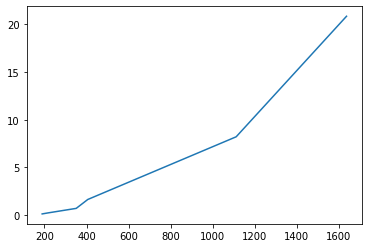

In [9]:
plt.plot(iterations,times)
plt.show()

In [10]:
results['r_hill']['fits'] = fits
results['r_hill']['fit_curves'] = curves
results['r_hill']['iterations'] = iterations
results['r_hill']['times'] = times
results['r_hill']['lengths'] = lengths


## 2. Genetic Algorithm

In [13]:
population_size = 100
mutation_prob = 0.5
max_attempts = 100
max_iters = 200

length = 8
max_val = 8

problem = mlrose.DiscreteOpt(length =length, 
                             fitness_fn = fitness_fn, 
                             maximize = maximize, 
                             max_val = max_val
                            )
state, fitness, curve = mlrose.genetic_alg(problem, 
                                           pop_size=population_size, 
                                           mutation_prob=mutation_prob, 
                                           max_attempts=max_attempts, 
                                           max_iters=max_iters, 
                                           curve=True, 
                                           random_state=13
                                          )

In [14]:
print(state)
print(fitness)


[4 2 4 6 1 3 5 7]
1.0


## 2.1 Hyperparam Analysis

In [15]:
population_size = 100
mutation_prob = 0.5
max_attempts = 100
max_iters = 10000

fits = []
times = []
iterations = []
curves = []
restarts = [5, 5, 5, 5, 5, 5]

i = 0
for length in lengths:
    print("starting length ", length)
    start_time = time.time()

    max_val = length
    print(type(max_val))
    problem = mlrose.DiscreteOpt(length =length, 
                                 fitness_fn = fitness_fn, 
                                 maximize = maximize, 
                                 max_val = max_val
                                )
    state, fitness, curve = mlrose.genetic_alg(problem, 
                                               max_iters=max_iters, 
                                               curve=True, 
                                               random_state=13
                                              )
    print(fitness)
   
    time_elapsed = time.time() - start_time
    fits.append(fitness)
    times.append(time_elapsed)
    iterations.append(len(curve))
    curves.append(curve)
    i+=1

starting length  4
<class 'int'>
0.0
starting length  8
<class 'int'>
1.0
starting length  16
<class 'int'>
7.0
starting length  32
<class 'int'>
17.0
starting length  64
<class 'int'>
32.0
starting length  128
<class 'int'>
26.0


In [16]:
print(lengths)
print(fits)
print(times)
print(iterations)

[4, 8, 16, 32, 64, 128]
[0.0, 1.0, 7.0, 17.0, 32.0, 26.0]
[0.40496349334716797, 0.7938644886016846, 0.9025838375091553, 2.2619504928588867, 9.05578088760376, 61.569342374801636]
[11, 14, 11, 15, 30, 110]


In [17]:
results['GA']['fits'] = fits
results['GA']['fit_curves'] = curves
results['GA']['iterations'] = iterations
results['GA']['times'] = times
results['GA']['lengths'] = lengths


## Simulated Annealing

In [18]:
mutation_prob = 0.2
max_attempts = 100
max_iters = 10000

length = 8
max_val = 8

problem = mlrose.DiscreteOpt(length =length, 
                             fitness_fn = fitness_fn, 
                             maximize = maximize, 
                             max_val = max_val
                            )
schedule = mlrose.GeomDecay(init_temp=10, decay=0.95, min_temp=0.001)
state, fitness, curve = mlrose.simulated_annealing(problem, 
                                                   schedule=schedule,
                                                   max_attempts=max_attempts, 
                                                   max_iters=max_iters, 
                                                   curve=True, 
                                                   random_state=13
                                                  )

In [19]:
print(state)
print(fitness)
print(len(curve))


[0 6 4 7 1 3 5 2]
0.0
1409


In [20]:


fits = []
times = []
iterations = []
curves = []
restarts = [5, 5, 5, 5, 5, 5]
i = 0
for length in lengths:
    print("starting length ", length)
    start_time = time.time()

    max_val = length
    print(type(max_val))
    problem = mlrose.DiscreteOpt(length =length, 
                                 fitness_fn = fitness_fn, 
                                 maximize = maximize, 
                                 max_val = max_val
                                )
    schedule = mlrose.GeomDecay(init_temp=10, decay=0.95, min_temp=0.001)
    state, fitness, curve = mlrose.simulated_annealing(problem, 
                                                       schedule=schedule,
                                                       max_attempts=max_attempts, 
                                                       max_iters=max_iters, 
                                                       curve=True, 
                                                       random_state=13
                                                      )
    print(fitness)
   
    time_elapsed = time.time() - start_time
    fits.append(fitness)
    times.append(time_elapsed)
    iterations.append(len(curve))
    curves.append(curve)
    i+=1

starting length  4
<class 'int'>
0.0
starting length  8
<class 'int'>
0.0
starting length  16
<class 'int'>
2.0
starting length  32
<class 'int'>
5.0
starting length  64
<class 'int'>
7.0
starting length  128
<class 'int'>
13.0


In [21]:
print(lengths)
print(fits)
print(times)
print(iterations)

[4, 8, 16, 32, 64, 128]
[0.0, 0.0, 2.0, 5.0, 7.0, 13.0]
[0.029925823211669922, 0.3271210193634033, 0.3420522212982178, 0.41791272163391113, 6.5095603466033936, 10.71737027168274]
[159, 1409, 843, 564, 4196, 3778]


In [22]:
results['SA']['fits'] = fits
results['SA']['fit_curves'] = curves
results['SA']['iterations'] = iterations
results['SA']['times'] = times
results['SA']['lengths'] = lengths

## MIMIC

In [23]:
population_size = 100
max_attempts = 100
max_iters = 100
keep_pct = 0.3

length = 8
max_val = 8

problem = mlrose.DiscreteOpt(length =length, 
                             fitness_fn = fitness_fn, 
                             maximize = maximize, 
                             max_val = max_val
                            )
state,fitness, curve = mlrose.mimic(problem, 
                                    pop_size = population_size, 
                                    keep_pct = keep_pct, 
                                    max_attempts = max_attempts, 
                                    max_iters = max_iters,  
                                    curve = True, 
                                    random_state = 1
                                   )

In [24]:
print(state)
print(fitness)
print(len(curve))

[1 5 7 1 6 0 6 4]
2.0
100


In [25]:
population_size = 100
max_attempts = 100
max_iters = 100
keep_pct = 0.3



fits = []
times = []
iterations = []
curves = []
restarts = [5, 5, 5, 5, 5, 5]
i = 0
for length in lengths:
    print("starting length ", length)
    start_time = time.time()

    max_val = length
    print(type(max_val))
    problem = mlrose.DiscreteOpt(length =length, 
                                 fitness_fn = fitness_fn, 
                                 maximize = maximize, 
                                 max_val = max_val
                                )
    state,fitness, curve = mlrose.mimic(problem, 
                                    pop_size = population_size, 
                                    keep_pct = keep_pct, 
                                    max_attempts = max_attempts, 
                                    max_iters = max_iters,  
                                    curve = True, 
                                    random_state = 1
                                   )
    print(fitness)
   
    time_elapsed = time.time() - start_time
    fits.append(fitness)
    times.append(time_elapsed)
    iterations.append(len(curve))
    curves.append(curve)
    i+=1                             
                        

starting length  4
<class 'int'>
0.0
starting length  8
<class 'int'>
2.0
starting length  16
<class 'int'>
4.0
starting length  32
<class 'int'>
18.0
starting length  64
<class 'int'>
50.0
starting length  128
<class 'int'>
105.0


In [26]:
print(lengths)
print(fits)
print(times)
print(iterations)

[4, 8, 16, 32, 64, 128]
[0.0, 2.0, 4.0, 18.0, 50.0, 105.0]
[1.7463598251342773, 4.022212266921997, 12.26624059677124, 42.33975100517273, 159.22114872932434, 624.1640391349792]
[100, 100, 100, 100, 100, 100]


In [27]:
results['MIMIC']['fits'] = fits
results['MIMIC']['fit_curves'] = curves
results['MIMIC']['iterations'] = iterations
results['MIMIC']['times'] = times
results['MIMIC']['lengths'] = lengths

# Analysis

In [359]:
"""
results = {
    'problem': 'n_queens',
    'r_hill': {
        'lengths':[], 
        'fits':[],
        'fit_curves':[],
        'iterations': [],
        'times': [],
    },
    'GA': {
        'lengths':[],
        'fits':[],
        'fit_curves':[],
        'iterations': [],
        'times': [],
    },
    'SA': {
        'lengths':[],
        'fits':[],
        'fit_curves':[],
        'iterations': [],
        'times': [],
    },
    'MIMIC': {
        'lengths':[],
        'fits':[],
        'fit_curves':[],
        'iterations': [],
        'times': [],
    },
}
"""

"\nresults = {\n    'problem': 'n_queens',\n    'r_hill': {\n        'lengths':[], \n        'fits':[],\n        'fit_curves':[],\n        'iterations': [],\n        'times': [],\n    },\n    'GA': {\n        'lengths':[],\n        'fits':[],\n        'fit_curves':[],\n        'iterations': [],\n        'times': [],\n    },\n    'SA': {\n        'lengths':[],\n        'fits':[],\n        'fit_curves':[],\n        'iterations': [],\n        'times': [],\n    },\n    'MIMIC': {\n        'lengths':[],\n        'fits':[],\n        'fit_curves':[],\n        'iterations': [],\n        'times': [],\n    },\n}\n"

[4, 8, 16, 32, 64, 128]


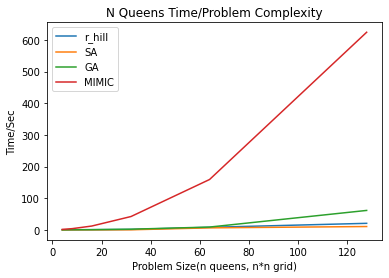

In [28]:
print(results['SA']['lengths'])

plt.plot(results['r_hill']['lengths'],results['r_hill']['times'], label="r_hill")
plt.plot(results['SA']['lengths'],results['SA']['times'], label="SA")
plt.plot(results['GA']['lengths'],results['GA']['times'], label="GA")
plt.plot(results['MIMIC']['lengths'],results['MIMIC']['times'], label="MIMIC")
plt.xlabel ('Problem Size(n queens, n*n grid)')
plt.ylabel ('Time/Sec')
plt.legend()
plt.title ('N Queens Time/Problem Complexity')
plt.show()

# Traveling Salesman

In [48]:
def tsp_generator(grid_size, num_cities):
    coords = []
    for i in range(num_cities):
        x = random.randint(0, grid_size[0]-1)
        y = random.randint(0, grid_size[1]-1)
        coords.append((x, y))
    return coords

In [49]:
coords = tsp_generator((9, 9), 8)
print(coords)

[(5, 0), (7, 4), (1, 4), (4, 2), (6, 7), (8, 8), (7, 2), (7, 0)]


In [50]:
fitness_coords = mlrose.TravellingSales(
                                        coords = [
                                                  (1, 1), (4, 2), 
                                                  (5, 2), (6, 4), 
                                                  (4, 4), (3, 6), 
                                                  (1, 5), (2, 3)
                                                 ]
                                        )

In [53]:
fitness = mlrose.TSPOpt(
                        length = 8, 
                        fitness_fn = fitness_coords, 
                        maximize=False
                       )

## Random Hill Climb

In [54]:

length = 8
maximize = False
max_val = 8
max_attempts = 20
max_iters = 100
restarts = 5
problem = mlrose.DiscreteOpt(length =length, 
                             fitness_fn = fitness, 
                             maximize = maximize, 
                             max_val = max_val
                            )

In [55]:
state, fitness, curve = mlrose.random_hill_climb(problem, 
                                                 max_attempts = max_attempts, 
                                                 max_iters=max_iters, 
                                                 restarts=restarts, 
                                                 curve=True, 
                                                 random_state=13
                                                )

AttributeError: 'TSPOpt' object has no attribute 'evaluate'

In [52]:
state, fitness = mlrose.genetic_alg(
                                    problem_fit, 
                                    random_state = 13
                                   )
print(state)
print(fitness)

ValueError: too many values to unpack (expected 2)